****
## JSON exercise
### by Chantel Clark

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Imports for Python, Pandas, and MatplotLib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [2]:
# load json as string
data = json.load((open('data/world_bank_projects.json')))

In [3]:
# load as pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')

## 1. The 10 countries with the most projects

In [4]:
json_df.countryname.value_counts().head(10)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [5]:
# Create a dataframe with columns 'code' and 'name'
theme_df = pd.DataFrame(json_normalize(data, 'mjtheme_namecode'))
# theme_df.head(15)

In [6]:
# These are the top 10 Major Theme Codes. Not very useful, would be much better to display 
# the names of the top 10 Major Themes. See updated answer and table in question 3, after 
# bulding new dataframe
theme_df.code.value_counts().head(10)

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

## 3. Create a dataframe with the missing names filled in

In [7]:
# Create a dictionary pairing 'code':'name'
theme_dict = theme_df.set_index('code').to_dict()
theme_dict = theme_dict['name']

In [8]:
# Fill in the missing names for keys 1 and 6
# code 1 = Economic management
theme_dict['1'] = 'Economic management'

# code 6 = Social protection and risk management
theme_dict['6'] = 'Social protection and risk management'
theme_dict

{'8': 'Human development',
 '11': 'Environment and natural resources management',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [9]:
# Find location of empy strings; bool_series
bool_series = theme_df['name'] == ''

In [10]:
# Create a DataFrame with only the rows that are missing 'name'; missing_df
missing_df = theme_df[bool_series]

In [11]:
# Fill in the missing names using dictionary theme_dict
missing_df['name'] = missing_df['code'].map(theme_dict)

/Users/Chantel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# Replace the rows in theme_df with missing_df
theme_df.loc[bool_series] = missing_df
theme_df.head(15)

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [13]:
theme_df.name.value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

Text(0.5, 1.0, 'Top 10 Major Project Themes')

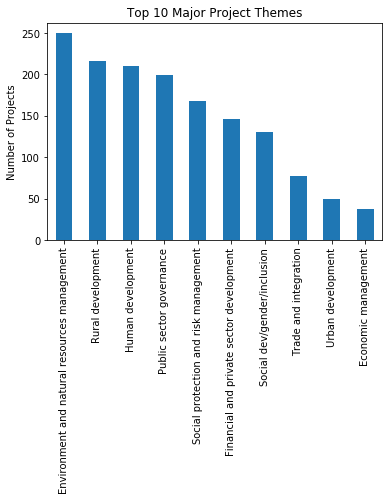

In [14]:
theme_df.name.value_counts().head(10).plot(kind='bar')
plt.ylabel('Number of Projects')
plt.title('Top 10 Major Project Themes')